# **Classification of areas prone to forest fires**


*Aimi Okabayashi, Thomas Boyer, David Dahan, Pierre-Aurélien Stahl, METTEZ VOS NOMS SVP*


This challenge was done as a project for the Master 2 Data Science (2022/2023), DATACAMP course:
<br><br>


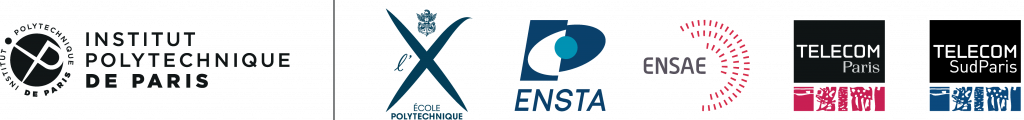

## **Introduction**

According to a Météo France study, risk of forest fire should be increasing in the years to come due to increased dryness. 



<img src="img\sizeofwildfires-large.png" >

                                            Nombre de feux de forêt aux Etats-Unis


This project aims at constructing a machine learning model capable at classifying point of areas prone to forest fires.



## **Description of the data**

Faire une description 

## **Requirements for running the notebook**

To properly run the notebook, the following Python modules must be imported :

In [ ]:
!pip install ramp-workflow

     |████████████████████████████████| 126 kB 4.3 MB/s 


In [10]:
from pathlib import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.feature_selection import f_classif

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler



from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve
from sklearn import metrics
from sklearn.metrics import PrecisionRecallDisplay



from sklearn.ensemble import RandomForestClassifier

from numpy import loadtxt
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression

import xgboost as xgb

%reload_ext autoreload
%autoreload 2

## Reading data 

In [7]:
dataframe_path="data\data.csv"

df = pd.read_csv(dataframe_path, sep=";")


In [6]:
df.head()

Date  mean_temp  urban  max_v_wind  water  forest_cover   pop_dens  \
0  2015-03-16   6.754768    0.0    2.205310    0.0      0.000000   4.033057   
1  2009-12-09   6.821233    0.0    6.430786    0.0      0.583333  18.135365   
2  2019-09-18  13.656255    0.0    6.825171    0.0      1.000000  22.281998   
3  2003-11-17   8.737279    0.0    9.491487    1.0      0.000000   0.000000   
4  2013-07-07  11.469363    0.0    8.228761    1.0      0.000000   0.281414   

    max_temp  sum_prec  mean_soil       vegetation_class  mean_rel_hum  \
0  14.472850  0.134782   0.316853  herbaceous_vegetation     79.347466   
1  15.657491  2.295774   0.285537                 forest     71.278786   
2  20.192055  0.000000   0.249150                 forest     77.566093   
3  14.000954  0.000000   0.255162                  water     75.327393   
4  19.220186  0.000000   0.108047                  water     71.936470   

   wetland  mean_wind_angle  fire  
0      0.0       131.806229     0  
1      0.0       123.350800     0  
2      0.0       164.623947     0  
3      0.0       288.652771     0  
4      0.0       157.468475     1

## Description of the data

### Description of the DataFrame

In each row of the data, there is a label "fire" that show is there was a fire or not. Each row is susiptable to have a fire 0 or 1.

 The features are : 
    
- "Date" : Date of the events     

- "mean_temp" : Mean Temperature of the day (in °C)

- "urban" : ratio of urbanisation of the area (between 0 and 1)

- "max_v_wind" : maximimum of wind velocity (in m/s)

- "water" : ratio of water in the area (between 0 and 1)

- "forest_cover" : ratio of forest in the area (between 0 and 1)

- "pop_dens" : density of population in the area (between 0 and 1)

- "max_temp" : Maximum Temperature of the day (in °C)

- "sum_prec" : precipitation of the day in the area (in mm)

- "mean_soil" : Mean soil moisture of the day (m^3/m^3)

- "vegeation" : type of vegetation (list of names)

- "mean_rel_humidity" : mean relative humidity (in %)

- "wetland" : ratio of wetland in the area (between 0 and 1) 

- "mean_wind_angle" : average angle of wind during the event (in °)





### Description of the data

In [14]:
data=df.copy()

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16088 entries, 0 to 16087
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              16088 non-null  object 
 1   mean_temp         16088 non-null  float64
 2   urban             16084 non-null  float64
 3   max_v_wind        16088 non-null  float64
 4   water             16084 non-null  float64
 5   forest_cover      16088 non-null  float64
 6   pop_dens          16088 non-null  float64
 7   max_temp          16088 non-null  float64
 8   sum_prec          16088 non-null  float64
 9   mean_soil         16088 non-null  float64
 10  vegetation_class  16066 non-null  object 
 11  mean_rel_hum      16088 non-null  float64
 12  wetland           16084 non-null  float64
 13  mean_wind_angle   16088 non-null  float64
 14  fire              16088 non-null  int64  
dtypes: float64(12), int64(1), object(2)
memory usage: 1.8+ MB


In [17]:
description=data.describe()
description

mean_temp         urban    max_v_wind         water  forest_cover  \
count  16088.000000  16084.000000  16088.000000  16084.000000  16088.000000   
mean       7.341704      0.005145      5.702554      0.356224      0.435609   
std        3.292291      0.054010      2.479129      0.471296      0.456107   
min       -4.109107      0.000000      0.978202      0.000000      0.000000   
25%        5.045434      0.000000      3.834832      0.000000      0.000000   
50%        7.181344      0.000000      5.228662      0.000000      0.250000   
75%        9.484971      0.000000      7.156111      1.000000      1.000000   
max       18.774755      1.000000     17.892080      1.000000      1.000000   

           pop_dens      max_temp      sum_prec     mean_soil  mean_rel_hum  \
count  16088.000000  16088.000000  16088.000000  16088.000000  16088.000000   
mean      14.832645     15.256328      1.610403      0.284432     75.903259   
std      117.260923      4.471258      3.161810      0.078591      8.105770   
min        0.000000      1.171763     -0.000007      0.051477     40.705662   
25%        0.000000     12.000636      0.000000      0.231190     70.407461   
50%        0.020987     14.950378      0.155632      0.287328     75.780781   
75%        0.716459     18.387455      1.751230      0.344941     81.468296   
max     2219.102051     32.431244     35.396515      0.501387     98.558968   

            wetland  mean_wind_angle          fire  
count  16084.000000     16088.000000  16088.000000  
mean       0.014108       197.778334      0.185728  
std        0.085711        83.412931      0.388899  
min        0.000000         0.792745      0.000000  
25%        0.000000       133.823299      0.000000  
50%        0.000000       202.841095      0.000000  
75%        0.000000       257.814651      0.000000  
max        1.000000       358.530182      1.000000

### Preprocessing

One variable is categorical. A OHE encoder is applied.

In [23]:
ohe = OneHotEncoder()
OHE = ohe.fit_transform(data[["vegetation_class"]])
OHE = OHE.toarray()

## **Exploratory Data Analysis**

### Correlation

Plot of the correlations of the most correlated variables :

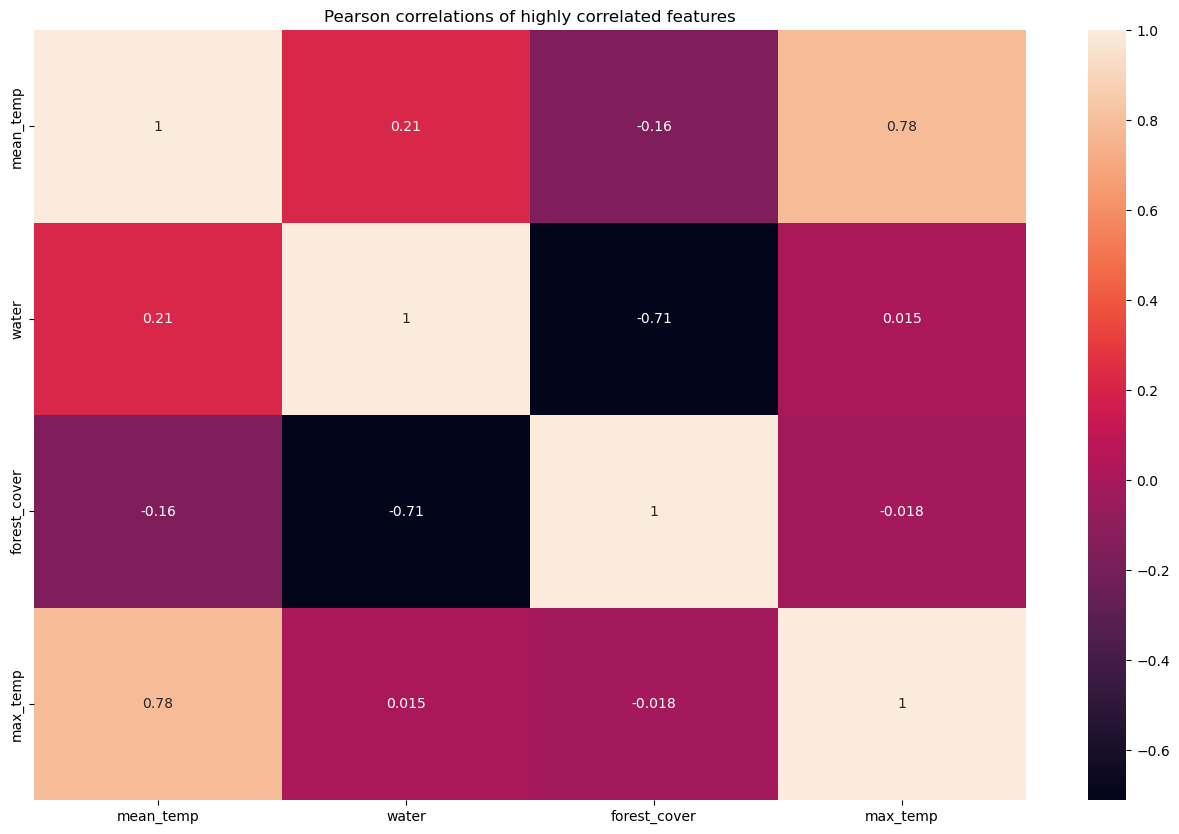

In [39]:
thresh = 0.7
cor = data.corr()

temp = cor.abs().unstack().sort_values(ascending=False)
most_cor_var = temp.loc[temp>thresh].reset_index().drop_duplicates(subset=[0])
most_cor_var_names = pd.unique(most_cor_var["level_0"].tolist()+most_cor_var["level_1"].tolist()).tolist()

top_cor = cor.loc[(cor.index.isin(most_cor_var_names)), (cor.columns.isin(most_cor_var_names))]

plt.figure(figsize=(16,10))
sns.heatmap(top_cor, annot=True)
plt.title("Pearson correlations of highly correlated features")
plt.show()

### Imbalenced Dataset

The dataset is imbalanced : 


<AxesSubplot:xlabel='fire', ylabel='count'>

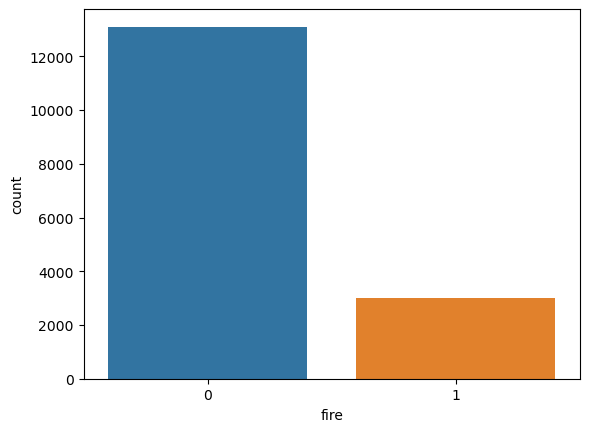

In [42]:
sns.countplot(data = data, x = "fire")

In [46]:
data["fire"].value_counts()

0    13100
1     2988
Name: fire, dtype: int64

In [48]:
ratio=data["fire"].value_counts()[1]/data["fire"].size

ratio

0.18572849328692193

### Others plots

Analysis of categorical feature : vegetation_class

[]

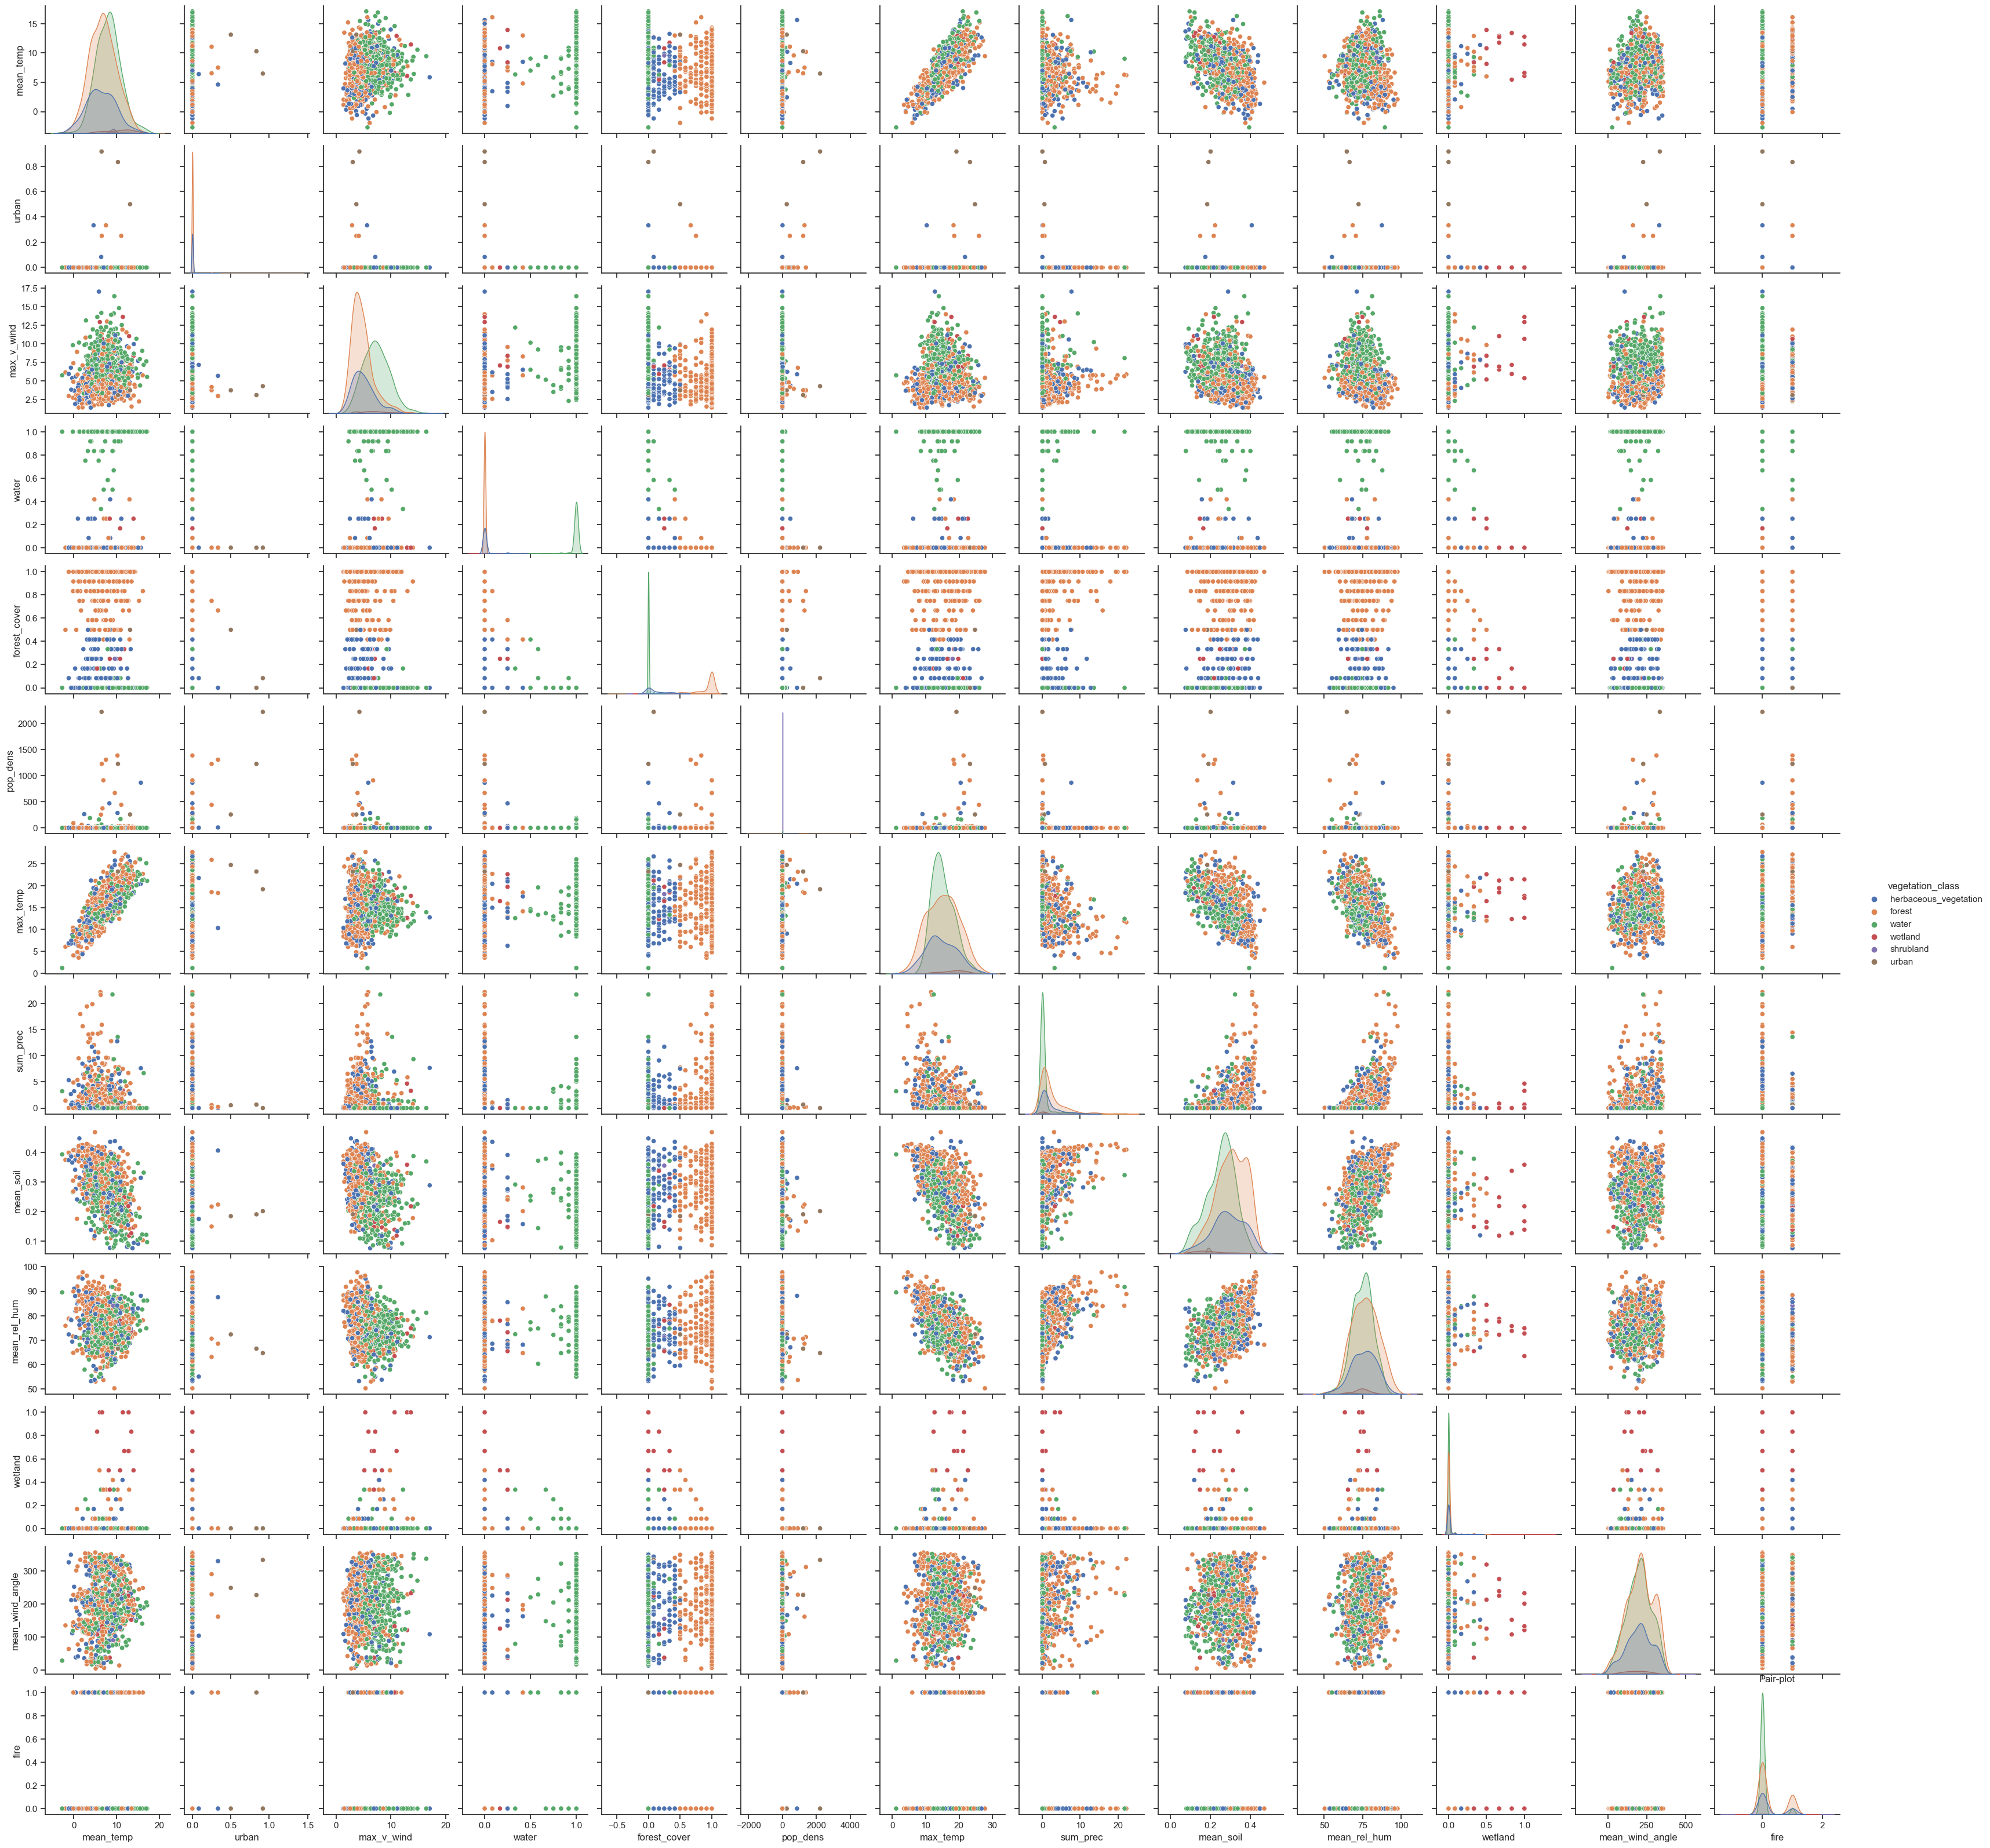

In [71]:
#plotting pair plots

sns.set_theme(style='ticks')
sns.pairplot(data[:1000], hue='vegetation_class')
plt.title('Pair-plot')
plt.plot()

Analyse of repartition for fire

[]

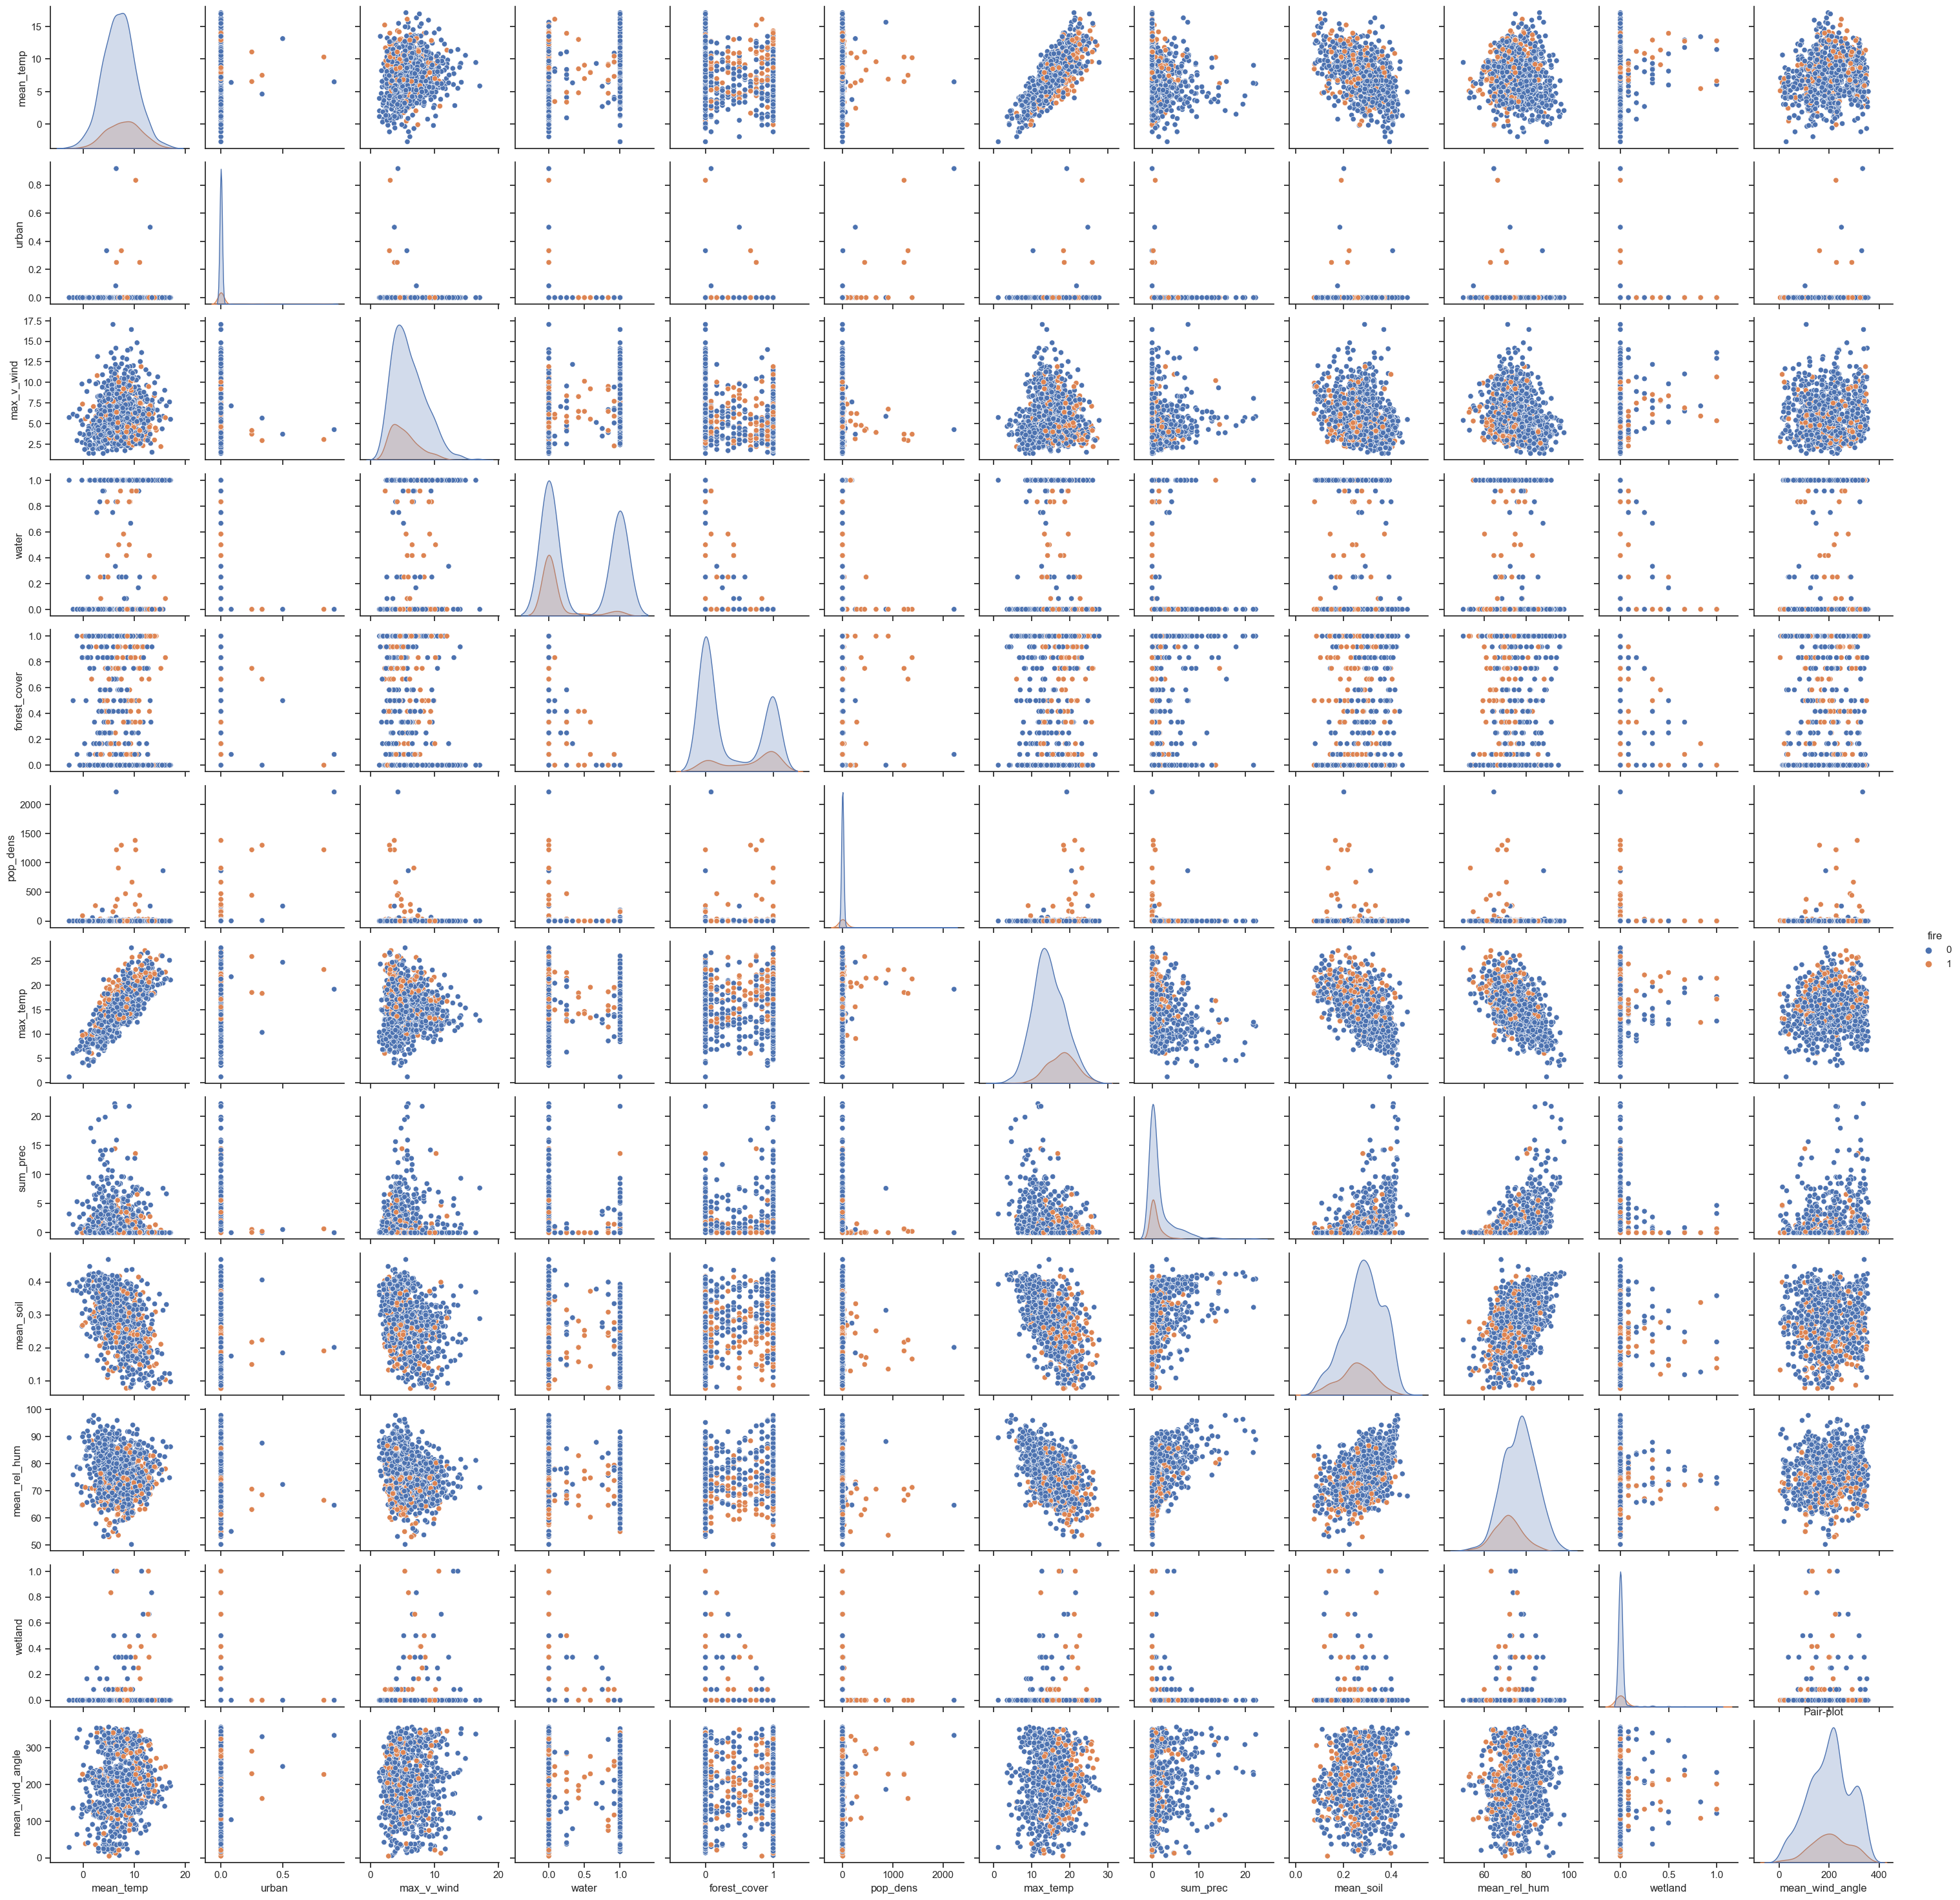

In [60]:

sns.set_theme(style='ticks')
sns.pairplot(data[:1000], hue='fire')
plt.title('Pair-plot')
plt.plot()

We can see that the feature between fire and non fire are closed. 

Here is some plots about the distribution about the feature. We can see for instance that the temperature is similar to a Gaussian. We can also see that most ratios are 0 or 1. 

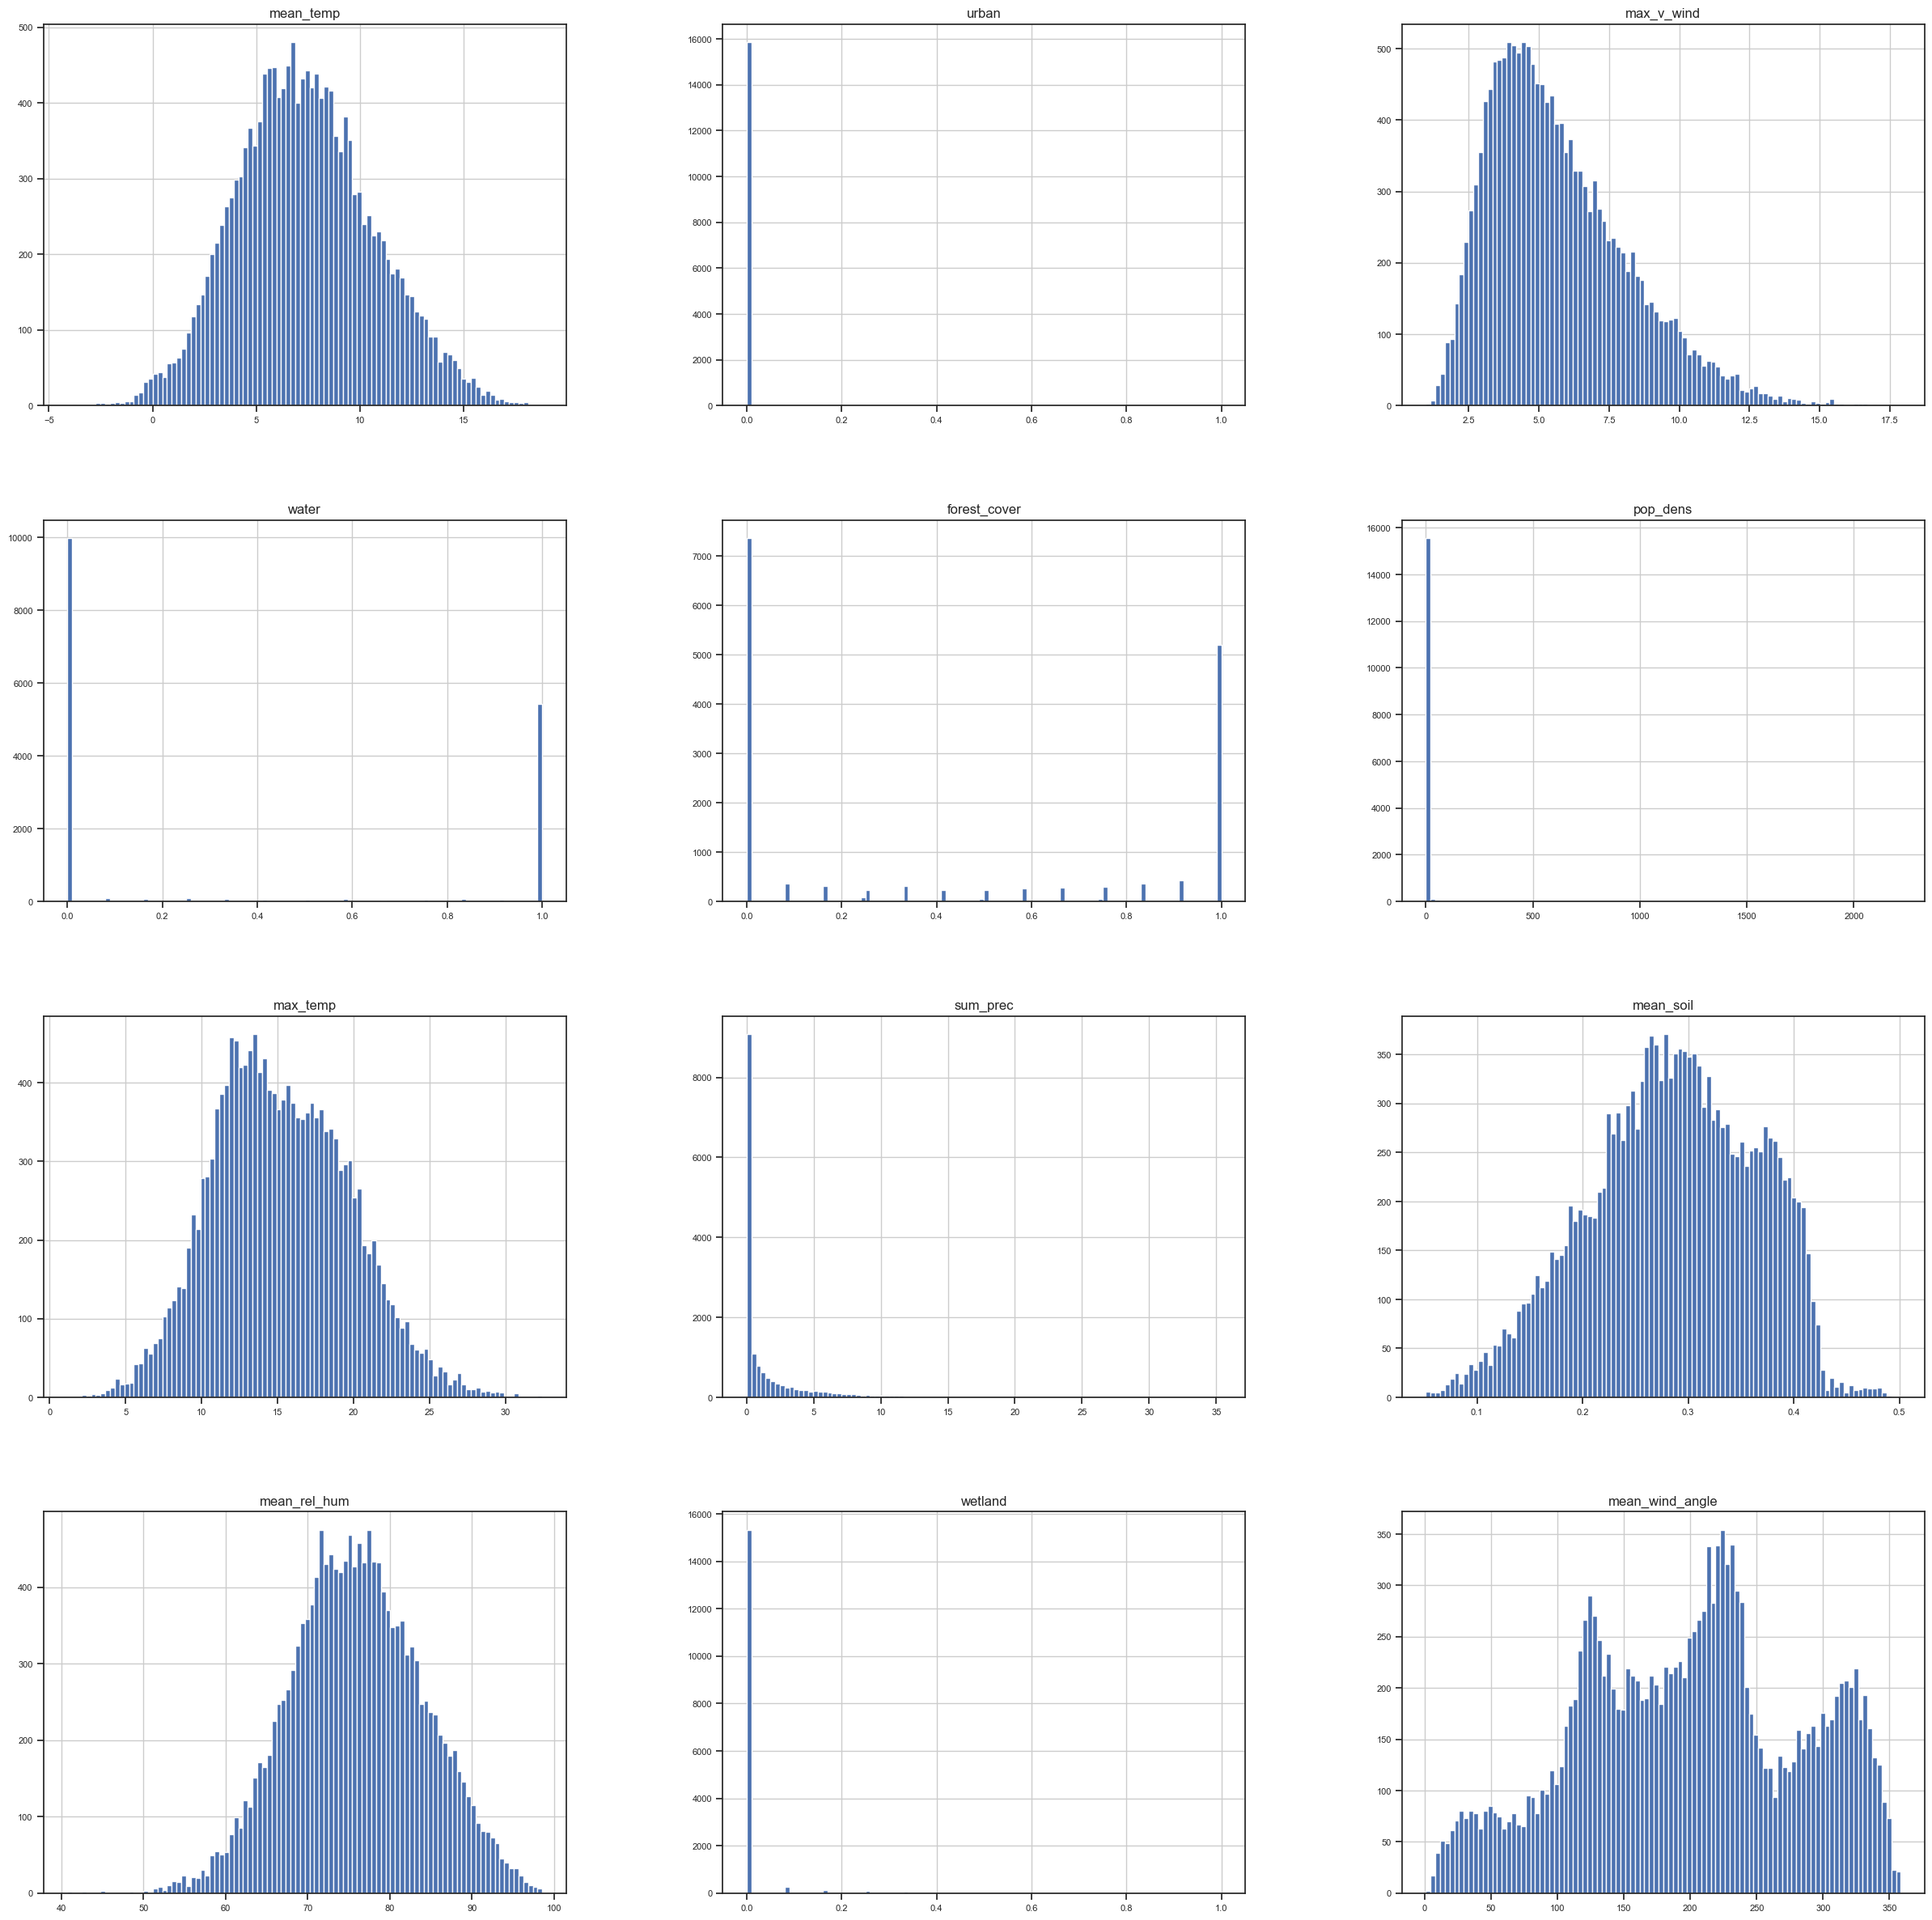

In [70]:
X=data.copy()
X.drop(columns=["fire"],axis=1,inplace=True)

X.hist(figsize=(30, 30), bins = 100, xlabelsize=8, ylabelsize=8)
plt.show()

The cell below defines 2 functions to make visualization easier. Tey were defined for the target ``Vaccine``, but it is trivial to adapt the code to show results for ``Business2``.

In [6]:
South_America =['Brazil', 'Ecuador']
North_America = ['Canada', 'Mexico', 'US']
Europe = ['France', 'Germany', 'Italy','Poland', 'Spain','Sweden', 'UK']
Africa = ['Nigeria', 'South_Africa']
Asia = ['China', 'India', 'Russia','Singapore', 'South_Korea']

continents = dict.fromkeys(South_America, 'South America')
continents = {**continents, **dict.fromkeys(North_America, 'North America')}
continents = {**continents, **dict.fromkeys(Europe, 'Europe')}
continents = {**continents, **dict.fromkeys(Africa, 'Africa')}
continents = {**continents, **dict.fromkeys(Asia, 'Asia')}

#------------------------------------------------------------------------------

def plot_one(col_grpby, title_acc_by_what):
  plt.figure(figsize=(15,6)) 
  dataframe  = df.copy()
  if col_grpby == "Continent":
    dataframe["Continent"] = dataframe["Country"].replace(continents)
  dataframe = dataframe.groupby([col_grpby])["Vaccine"].value_counts(normalize=True)
  dataframe = dataframe.mul(100)
  dataframe = dataframe.rename('percent').reset_index()
  
  ax = sns.barplot(x="level_1", y="percent", hue=col_grpby, data=dataframe)

  plt.title(f'Acceptancy of Vaccine by {title_acc_by_what}')
  ax.set_ylabel('Percentage of acceptency')
  ax.set_xlabel('Acceptancy Levels')
  ax.set_xticklabels(["Completely disagree", 
                      "Somewhat disagree", 
                      "Neutral/no opinion",
                      "Somewhat agree",
                      "Completely agree"], rotation=0, fontsize=10)

  plt.show()

#------------------------------------------------------------------------------

def plot_five(list_cols_grp_by):
  plt.subplots(5, 1, figsize=(15,25))
  labels = ["Completely disagree", 
            "Somewhat disagree", 
            "Neutral/no opinion",
            "Somewhat agree",
            "Completely agree"]

  plt.subplot(511)
  df_country = df[df['Country'].isin(South_America)].groupby(list_cols_grp_by)['Vaccine'].value_counts(normalize=True)
  df_country = df_country.mul(100)
  df_country = df_country.rename('percent').reset_index().dropna()
  df_country['Country'] = df_country['Country'].astype(CategoricalDtype(South_America))  # drop other continents
  if list_cols_grp_by == ['Country', 'trusthealth']:
    df_country['_'.join(["Country", "trusthealth"])] =  pd.Series(df_country.reindex(["Country", "trusthealth"], axis='columns')
                                     .astype('str')
                                     .values.tolist()
                                  ).str.join('_')
    ax=sns.barplot(x="level_2", y="percent", hue='_'.join(["Country", "trusthealth"]), data=df_country)
  else:
    ax = sns.barplot(x="level_1", y="percent", hue="Country", data=df_country)
  plt.title('Acceptancy of Vaccine by Country in South America')
  ax.set_ylabel('Percentage of acceptency')
  ax.set_xlabel('Acceptancy Levels')
  ax.set_xticklabels(labels)

  plt.subplot(512)
  df_country = df[df['Country'].isin(North_America)].groupby(list_cols_grp_by)['Vaccine'].value_counts(normalize=True)
  df_country = df_country.mul(100)
  df_country = df_country.rename('percent').reset_index().dropna()
  df_country['Country'] = df_country['Country'].astype(CategoricalDtype(North_America))  # drop other continents
  if list_cols_grp_by == ['Country', 'trusthealth']:
    df_country['_'.join(["Country", "trusthealth"])] =  pd.Series(df_country.reindex(["Country", "trusthealth"], axis='columns')
                                     .astype('str')
                                     .values.tolist()
                                  ).str.join('_')
    ax=sns.barplot(x="level_2", y="percent", hue='_'.join(["Country", "trusthealth"]), data=df_country)
  else:
    ax = sns.barplot(x="level_1", y="percent", hue="Country", data=df_country)
  plt.title('Acceptancy of Vaccine by Country in North America')
  ax.set_ylabel('Percentage of acceptency')
  ax.set_xlabel('Acceptancy Levels')
  ax.set_xticklabels(labels)

  plt.subplot(513)
  df_country = df[df['Country'].isin(Europe)].groupby(list_cols_grp_by)['Vaccine'].value_counts(normalize=True)
  df_country = df_country.mul(100)
  df_country = df_country.rename('percent').reset_index().dropna()
  df_country['Country'] = df_country['Country'].astype(CategoricalDtype(Europe))  # drop other continents
  if list_cols_grp_by == ['Country', 'trusthealth']:
    df_country['_'.join(["Country", "trusthealth"])] =  pd.Series(df_country.reindex(["Country", "trusthealth"], axis='columns')
                                     .astype('str')
                                     .values.tolist()
                                  ).str.join('_')
    ax=sns.barplot(x="level_2", y="percent", hue='_'.join(["Country", "trusthealth"]), data=df_country)
  else:
    ax = sns.barplot(x="level_1", y="percent", hue="Country", data=df_country)
  plt.title('Acceptancy of Vaccine by Country in Europe')
  ax.set_ylabel('Percentage of acceptency')
  ax.set_xlabel('Acceptancy Levels')
  ax.set_xticklabels(labels)

  plt.subplot(514)
  df_country = df[df['Country'].isin(Africa)].groupby(list_cols_grp_by)['Vaccine'].value_counts(normalize=True)
  df_country = df_country.mul(100)
  df_country = df_country.rename('percent').reset_index().dropna()
  df_country['Country'] = df_country['Country'].astype(CategoricalDtype(Africa))  # drop other continents
  if list_cols_grp_by == ['Country', 'trusthealth']:
    df_country['_'.join(["Country", "trusthealth"])] =  pd.Series(df_country.reindex(["Country", "trusthealth"], axis='columns')
                                     .astype('str')
                                     .values.tolist()
                                  ).str.join('_')
    ax=sns.barplot(x="level_2", y="percent", hue='_'.join(["Country", "trusthealth"]), data=df_country)
  else:
    ax = sns.barplot(x="level_1", y="percent", hue="Country", data=df_country)
  plt.title('Acceptancy of Vaccine by Country in Africa')
  ax.set_ylabel('Percentage of acceptency')
  ax.set_xlabel('Acceptancy Levels')
  ax.set_xticklabels(labels)

  plt.subplot(515)
  df_country = df[df['Country'].isin(Asia)].groupby(list_cols_grp_by)['Vaccine'].value_counts(normalize=True)
  df_country = df_country.mul(100)
  df_country = df_country.rename('percent').reset_index().dropna()
  df_country['Country'] = df_country['Country'].astype(CategoricalDtype(Asia))  # drop other continents
  if list_cols_grp_by == ['Country', 'trusthealth']:
    df_country['_'.join(["Country", "trusthealth"])] =  pd.Series(df_country.reindex(["Country", "trusthealth"], axis='columns')
                                     .astype('str')
                                     .values.tolist()
                                  ).str.join('_')
    ax=sns.barplot(x="level_2", y="percent", hue='_'.join(["Country", "trusthealth"]), data=df_country)
  else:
    ax = sns.barplot(x="level_1", y="percent", hue="Country", data=df_country)
  plt.title('Acceptancy of Vaccine by Country in Asia')
  ax.set_ylabel('Percentage of acceptency')
  ax.set_xlabel('Acceptancy Levels')
  ax.set_xticklabels(labels)

  plt.tight_layout()
  plt.show()

You can uncomment the line corresponding to the desired visualization or add your owns:

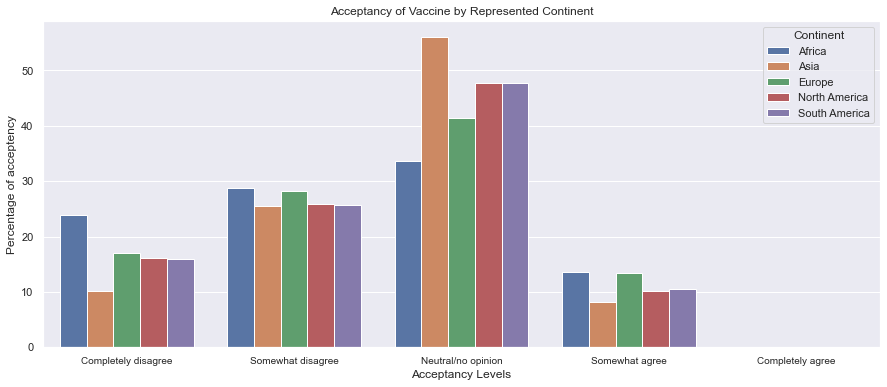

In [7]:
plot_one("Continent", "Represented Continent")
# plot_one("trusthealth", "Trust in the health system")
# plot_one("Gender", "Gender")
# plot_one("Age_group", "Age Group")
# plot_one("within_country", "Income Level Within Country")
#plot_one("world_wide", "Income Level World Wide")

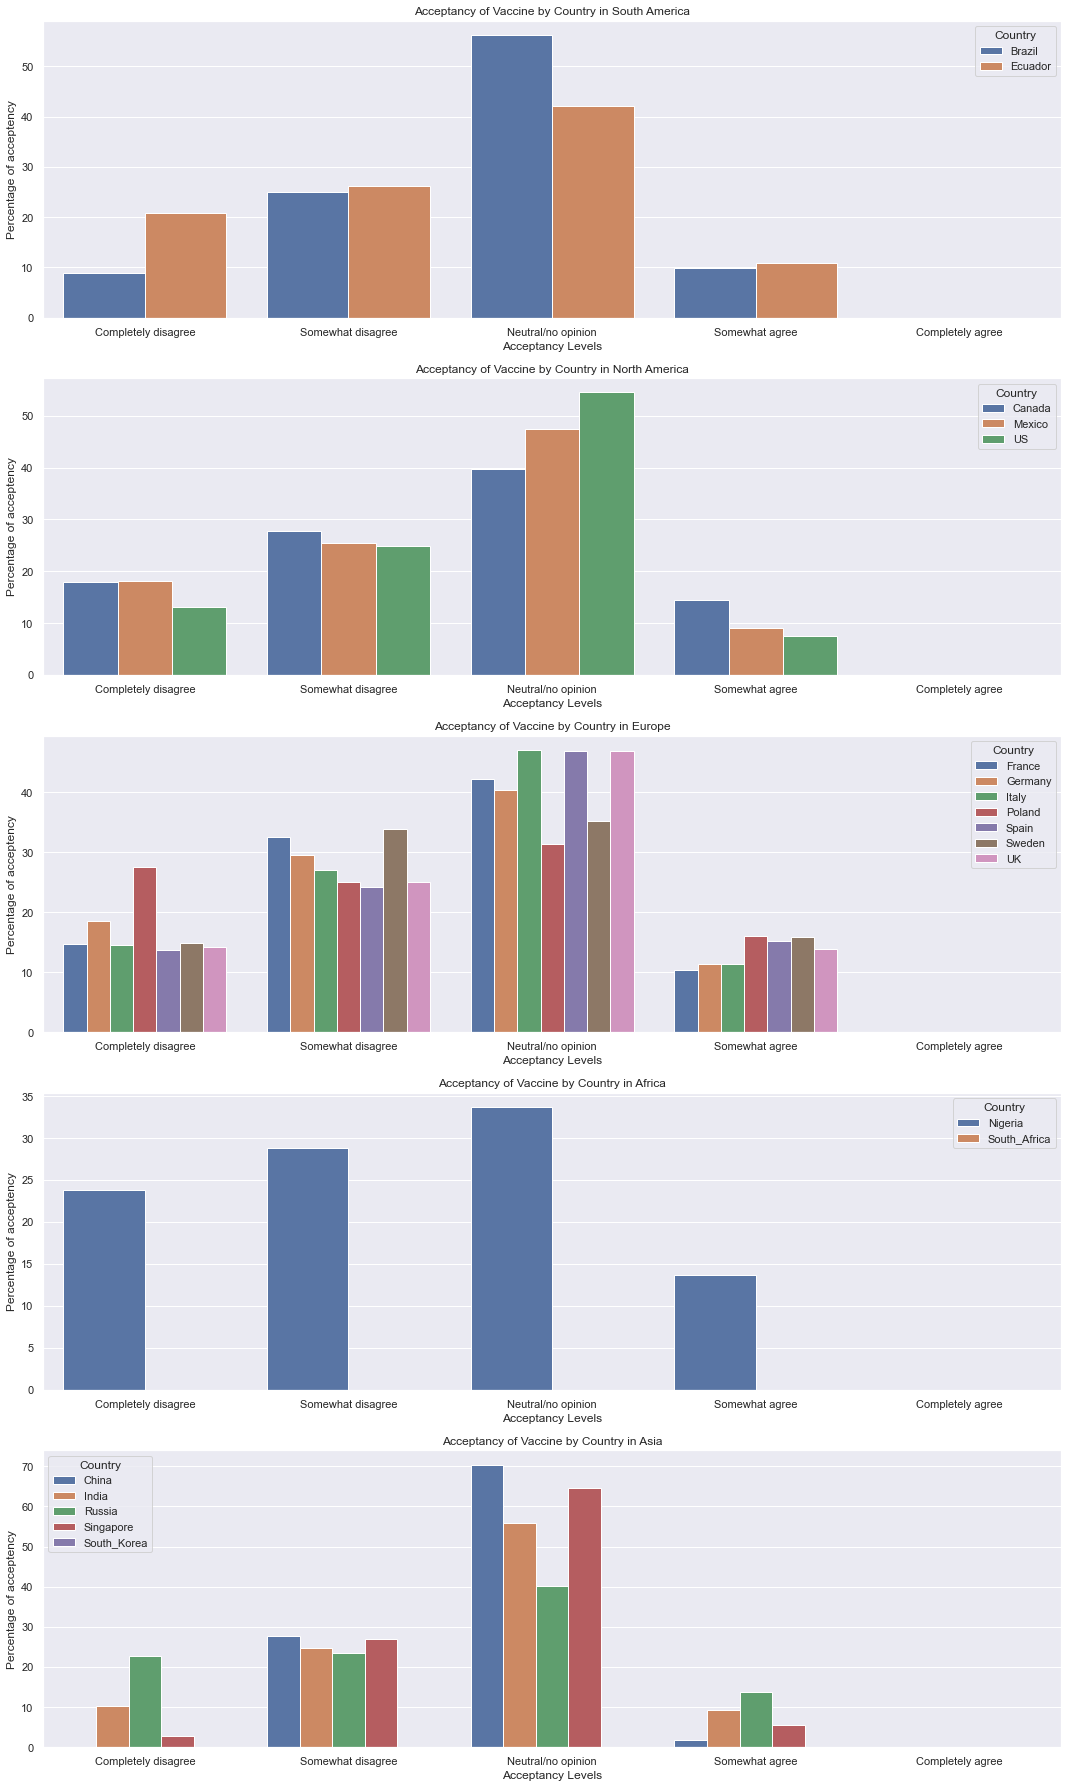

In [8]:
plot_five(['Country'])
# plot_five(['Country', 'trusthealth'])


## **Baseline Model: XGBoost Classifier**

After the feature engineering process, we used a random forest and an xgboost model to predict each one of our labels (Business2, Vaccine) seperately and combined. Finally, we choosed the xgboost trained on the target variables seperately after comparing their metrics results.

**Variables Selection**



In [9]:
numeric_features=['trusthealth', 'sickwithCOVID', 'Age', 'Language', 'mortalityperm', 'trustngov', 'poptrusthealth', 'Region', 'stringency_index', 'case_rate', 'death_rate']
categorical_features = ['Country', 'Universal_edu', 'Age_group', 'Gender','within_country', 'world_wide' ]

**Pipeline Creation**

We applied:


1.   OneHotEncoding on categorical variables
2.   Normalisation on numerical variables



In [10]:
import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline

In [11]:
label_enc_vac = LabelEncoder()
label_enc_vac.fit(y_train['Vaccine'])
label_enc_bus = LabelEncoder()
label_enc_bus.fit(y_train['Business2'])

LabelEncoder()

In [12]:
#Preprocessing
preprocessor = ColumnTransformer([
    ("hot_encoder", OneHotEncoder(), categorical_features),
    ("scaler", MinMaxScaler(), numeric_features),
])
#Pipeline   
model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", xgb.XGBClassifier(n_estimators=100, objective='multi:softmax',
                                     use_label_encoder=False, eval_metric='mlogloss')),
])
#Fiting the model on the first target variable "Vaccine"
model.fit(X_train, label_enc_vac.transform(y_train['Vaccine']))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('hot_encoder',
                                                  OneHotEncoder(),
                                                  ['Country', 'Universal_edu',
                                                   'Age_group', 'Gender',
                                                   'within_country',
                                                   'world_wide']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['trusthealth',
                                                   'sickwithCOVID', 'Age',
                                                   'Language', 'mortalityperm',
                                                   'trustngov',
                                                   'poptrusthealth', 'Region',
                                                   'stringency_index',
                                   

In [13]:
#Predictions for the first target variable "Vaccine"
predictions1 = model.predict(X_test)
metric1 =  balanced_accuracy_score(label_enc_vac.transform(y_test['Vaccine']), predictions1)
print('Test Accuracy for vaccine:', metric1)

Test Accuracy for vaccine: 0.5282914150287127


`**Remarks:**` We can see that stringency_index has the higher correlation with the target variable.

In [14]:
#Fiting the model on the second target variable "Business2"
model.fit(X_train, label_enc_bus.transform(y_train['Business2']))
predictions2 = model.predict(X_test)
metric2 = balanced_accuracy_score(label_enc_bus.transform(y_test['Business2']), predictions2)
print('Test Accuracy for Business2:', metric2)

Test Accuracy for Business2: 0.5914445118573342


`**Remarks:**` We can see that trusthealth variable has the higher correlation with the target variable "Business2".

**Model Evaluation**

In [15]:
BAS = (metric1 + metric2)/2
print('The Balanced Accuracy Score of the Basline Model is:', BAS)

The Balanced Accuracy Score of the Basline Model is: 0.5598679634430235


## **Quick submission test**

You can test any submission locally by running:

```
ramp-test --submission <submission folder>
```
If you want to quickly test the that there are no obvious code errors, use the `--quick-test` flag to only use a small subset of the data.

```
ramp-test --submission <submission folder> --quick-test
```

See the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html) for more details.

## **References**

[1] Lazarus, J.V., Ratzan, S.C., Palayew, A. et al. A global survey of potential acceptance of a COVID-19 vaccine. Nat Med 27, 225–228 (2021). https://doi.org/10.1038/s41591-020-1124-9